In [1]:
%run IDM_helper_functions.ipynb

In [2]:
# Training data  52500, W_neg = 8400
n_sim_train = 50000
prior_IDM = utils.BoxUniform(low=[8200,0.01], high=[8600,0.1])
param_IDM = prior_IDM.sample((n_sim_train,))
x_IDM_train = simul_IDM_Inh_D(np.array(param_IDM))


sim0
sim1000
sim2000
sim3000
sim4000
sim5000
sim6000
sim7000
sim8000
sim9000
sim10000
sim11000
sim12000
sim13000
sim14000
sim15000
sim16000
sim17000
sim18000
sim19000
sim20000
sim21000
sim22000
sim23000
sim24000
sim25000
sim26000
sim27000
sim28000
sim29000
sim30000
sim31000
sim32000
sim33000
sim34000
sim35000
sim36000
sim37000
sim38000
sim39000
sim40000
sim41000
sim42000
sim43000
sim44000
sim45000
sim46000
sim47000
sim48000
sim49000


In [3]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior_IDM)
trainer = trainer.append_simulations(param_IDM, x_IDM_train)
mnle = trainer.train()


C:\Users\ra36qix\Documents\GitHub\sbi\sbi\neural_nets\mnle.py:60: UserWarning: The mixed neural likelihood estimator assumes that x contains
        continuous data in the first n-1 columns (e.g., reaction times) and
        categorical data in the last column (e.g., corresponding choices). If
        this is not the case for the passed `x` do not use this function.
  warnings.warn(


 Neural network successfully converged after 46 epochs.

In [4]:
#
mcmc_parameters = dict(num_chains=10,thin=10,warmup_steps=100,init_strategy="sir")
#mcmc_parameters=dict(init_strategy="resample", num_chains=10, warmup_steps=100)
#mnle_posterior = trainer.build_posterior(mnle, prior)


In [9]:
# inference with different x_o that has 100 trials
#torch.manual_seed(41)
num_trials = 1000
num_samples = 100
parameters_o = prior_IDM.sample((1,))
x_o = simul_IDM_Inh_D(np.array(parameters_o.repeat(num_trials, 1)))


sim0


In [11]:
mnle_posterior = trainer.build_posterior(mnle, prior_IDM,
                                        mcmc_method="slice_np_vectorized", 
                                             mcmc_parameters=mcmc_parameters)
mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)


Running vectorized MCMC with 10 chains:   0%|          | 0/11000 [00:00<?, ?it/s]

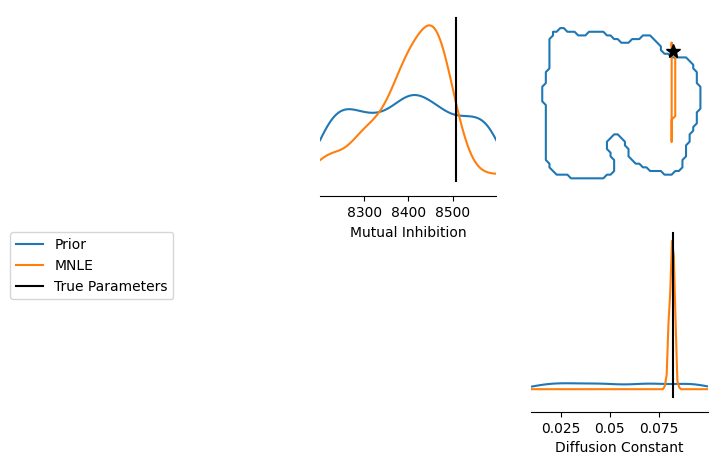

In [12]:
# num_trials = 300
pair_plot(prior_IDM, mnle_samples, parameters_o, figsize = (5,5), contour = 0.7, 
          labels=["Mutual Inhibition", "Diffusion Constant"])

In [13]:
n_trials = 1000
sim_num = 20

param_IDM = prior_IDM.sample((sim_num,))
par_fitted = np.zeros((sim_num,param_IDM.shape[1]))

In [14]:

for i in range(sim_num):
    print(i)
    IDM_o = simul_IDM_Inh_D(np.tile(param_IDM[i,:], (n_trials,1))) # 

   # mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")
    mnle_posterior = trainer.build_posterior(prior = prior_IDM,
                                             mcmc_method="slice_np_vectorized", 
                                             mcmc_parameters=mcmc_parameters)

    mnle_posterior.set_default_x(IDM_o)
    mnle_map = mnle_posterior.map()
    print(param_IDM[i,:])
    print(mnle_map)
    par_fitted[i,:] = np.array(mnle_map)

0
sim0
tensor([8.3071e+03, 2.6933e-02])
tensor([8.3263e+03, 2.7889e-02])
1
sim0
tensor([8.3055e+03, 3.2979e-02])
tensor([8.3603e+03, 3.4249e-02])
2
sim0
tensor([8.5793e+03, 2.1406e-02])
tensor([8.5994e+03, 2.1401e-02])
3
sim0
tensor([8.4748e+03, 2.0071e-02])
tensor([8.5974e+03, 2.0158e-02])
4
sim0
tensor([8.3404e+03, 6.3275e-02])
tensor([8.5184e+03, 6.5750e-02])
5
sim0
tensor([8.5600e+03, 7.3354e-02])
tensor([8.5503e+03, 7.4832e-02])
6
sim0
tensor([8.2396e+03, 3.9821e-02])
tensor([8.4125e+03, 4.0179e-02])
7
sim0
tensor([8.4731e+03, 7.7753e-02])
tensor([8.4978e+03, 7.8728e-02])
8
sim0
tensor([8.5905e+03, 2.2229e-02])
tensor([8.6000e+03, 2.2580e-02])
9
sim0
tensor([8.4012e+03, 4.2831e-02])
tensor([8.5534e+03, 4.4297e-02])
10
sim0
tensor([8.3181e+03, 4.3189e-02])
tensor([8.3240e+03, 4.2258e-02])
11
sim0
tensor([8.3632e+03, 5.7749e-02])
tensor([8.4543e+03, 5.8672e-02])
12
sim0
tensor([8.3426e+03, 2.7656e-02])
tensor([8.5998e+03, 2.8344e-02])
13
sim0
tensor([8.2718e+03, 4.5731e-02])
tensor(

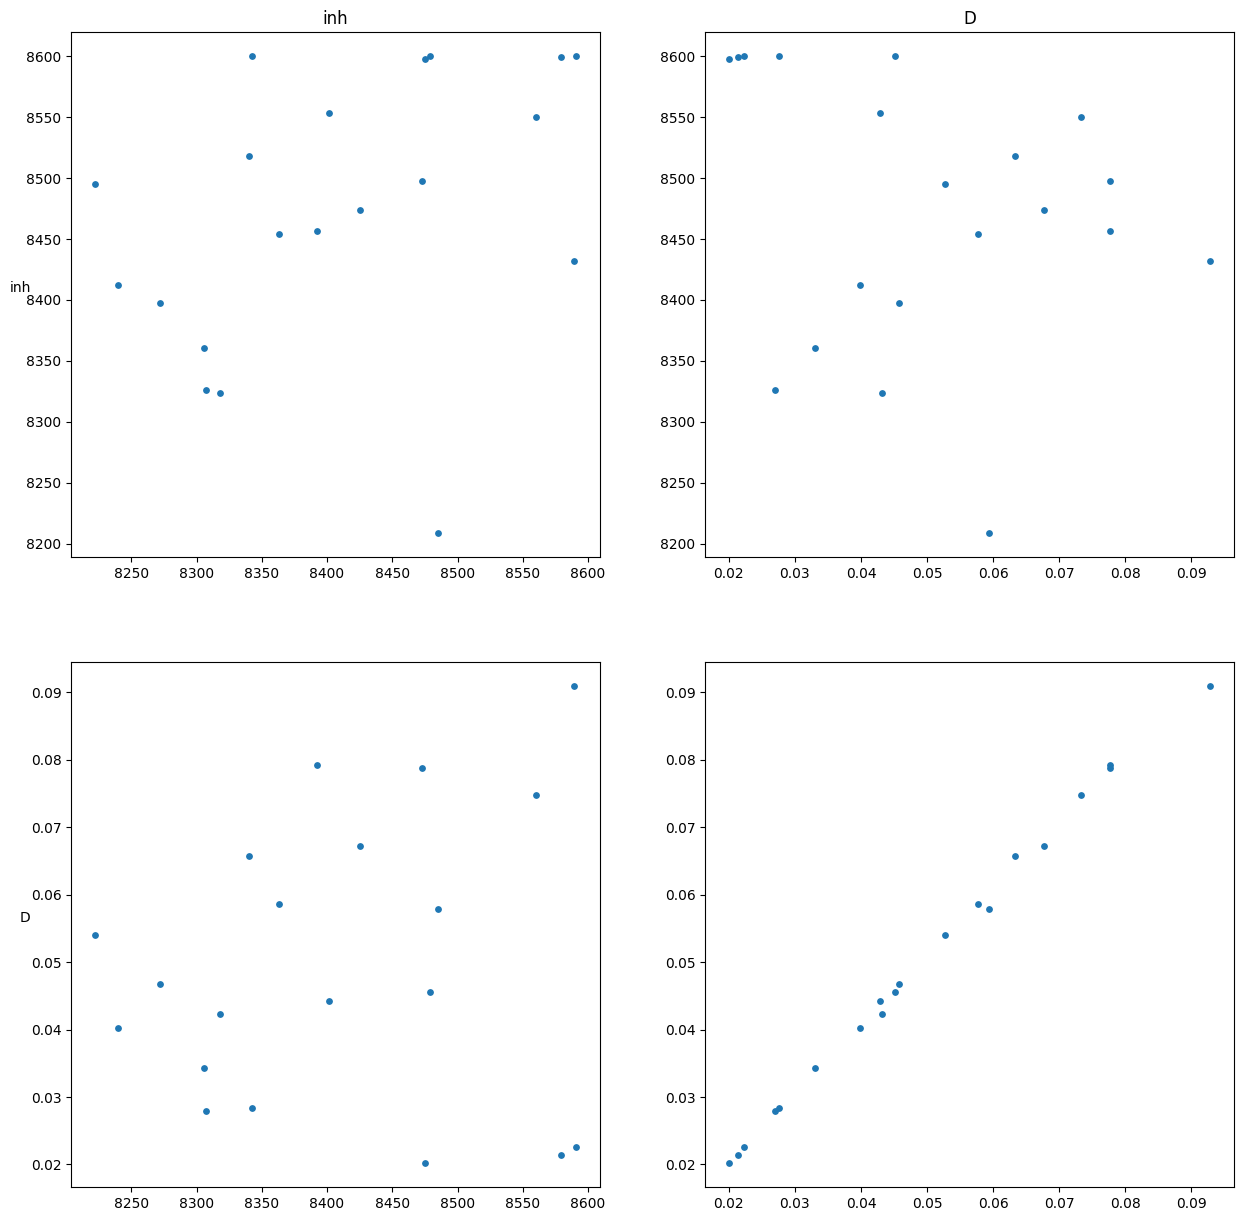

In [15]:
## n_trials = 1000
par_labels = ["inh", "D"]
par_fitted_labels = ["inh", "D"]
sim_fit_plot_all(param_IDM, par_fitted, par_labels, par_fitted_labels, s = 15, figsize=(15,15))

(8200.0, 8600.0)

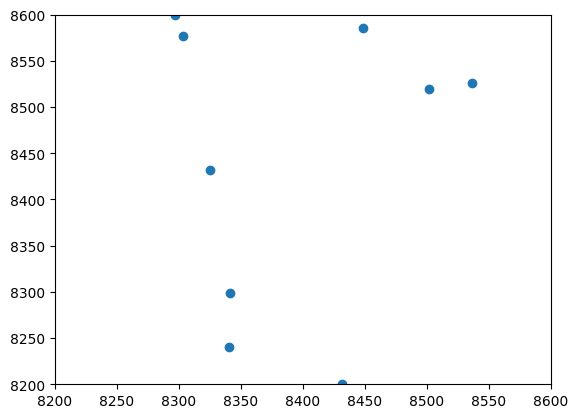

In [8]:
plt.scatter(param_IDM[0:9,0], par_fitted[0:9,0])
plt.xlim(8200,8600)
plt.ylim(8200,8600)

In [ ]:
#prior_IDM = utils.BoxUniform(low=[51000,8000], high=[54000,8800])

par_labels = ["Mutual Inhibition", "Diffusion Constant"]
par_fitted_labels = ["Mutual Inhibition", "Diffusion Constant"]
sim_fit_plot_all(param_IDM, par_fitted, par_labels, par_fitted_labels, s = 15, figsize=(8,8))

In [ ]:
n_trials = 300
sim_num = 30
#prior_IDM = utils.BoxUniform(low=[52000,8200], high=[53000,8600])

param_IDM, par_fitted = IDM_IDM_EM2(prior_IDM, n_trials = n_trials, sim_num = sim_num)
#np.savetxt('param_DDM_D1_N500.csv', param_DDM, delimiter=',')
#np.savetxt('param_IDM_D1_N500.csv', par_fitted, delimiter=',')

In [ ]:
#prior_IDM = utils.BoxUniform(low=[51000,8000], high=[54000,8800])

par_labels = ["Self-Excitation", "Mutual Inhibition"]
par_fitted_labels = ["Self-Excitation", "Mutual Inhibition"]
sim_fit_plot_all(param_IDM, par_fitted, par_labels, par_fitted_labels, s = 15, figsize=(8,8))

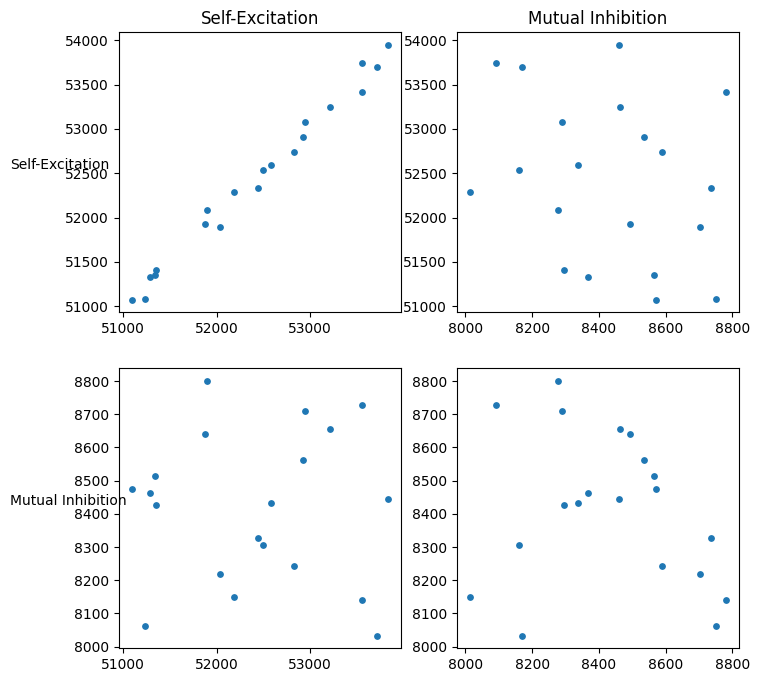

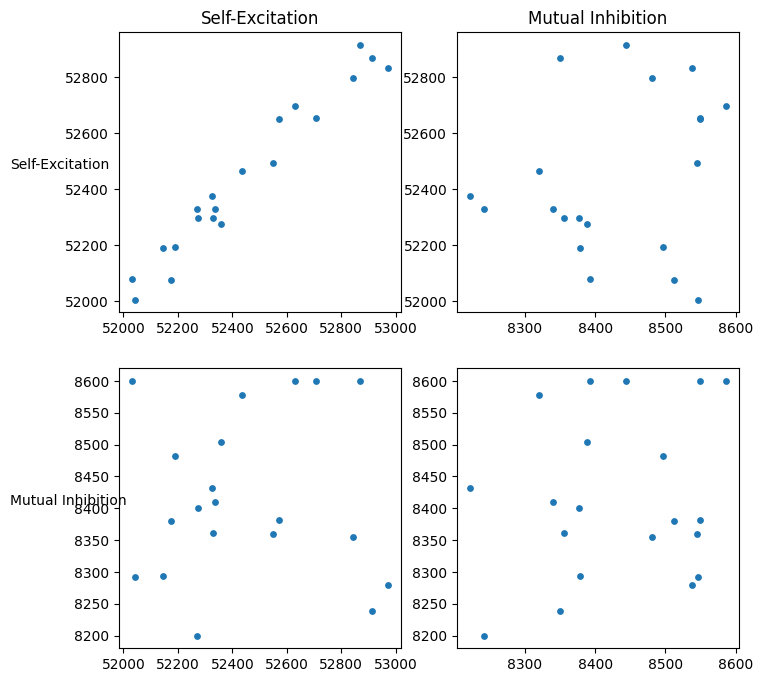

In [25]:
## n_trials = 300 change the MCMC_parameters to default
par_labels = ["Self-Excitation", "Mutual Inhibition"]
par_fitted_labels = ["Self-Excitation", "Mutual Inhibition"]
sim_fit_plot_all(param_IDM, par_fitted, par_labels, par_fitted_labels, s = 15, figsize=(8,8))

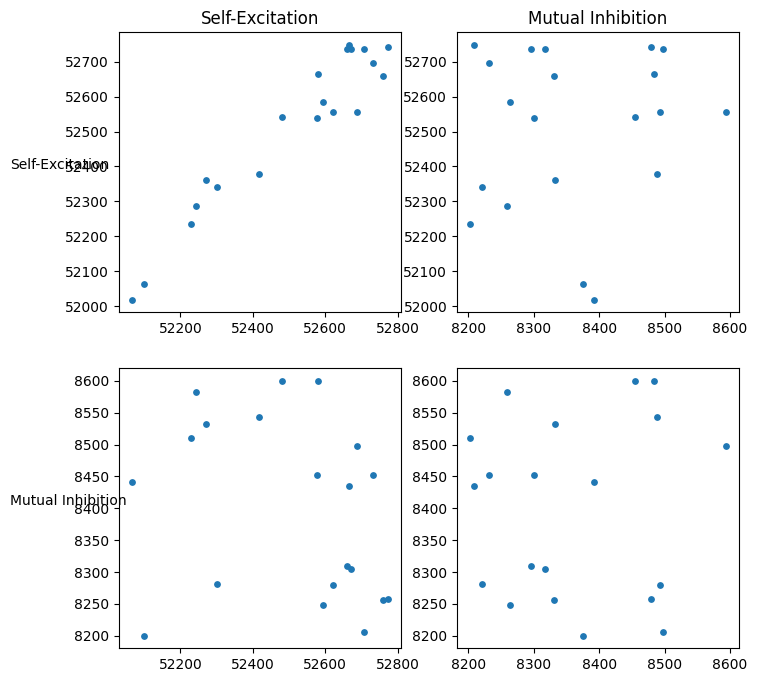

In [17]:
## n_trials = 300
par_labels = ["Self-Excitation", "Mutual Inhibition"]
par_fitted_labels = ["Self-Excitation", "Mutual Inhibition"]
sim_fit_plot_all(param_IDM, par_fitted, par_labels, par_fitted_labels, s = 15, figsize=(8,8))

In [68]:
n_trials = 200
num_samples = 500
sim_num = 20
prior_IDM = utils.BoxUniform(low=[51000,8000], high=[54000,8800])


In [71]:
param_IDM = prior_IDM.sample((sim_num,))
par_fitted = np.zeros((sim_num,param_IDM.shape[1]))
for i in range(sim_num):
    print(i)
    IDM_o = simul_IDM_Inh_Exc(np.tile(param_IDM[i,:], (n_trials,1))) # 

    mcmc_parameters = dict(num_chains=10,thin=10,warmup_steps=50,init_strategy="proposal")
    mnle_posterior = trainer.build_posterior(mnle, 
                                             prior_IDM, 
                                             mcmc_method="slice_np_vectorized", 
                                             mcmc_parameters=mcmc_parameters)
    
    # get the posterior samples
    mnle_samples = mnle_posterior.sample((num_samples,), x=IDM_o)
    post_mean = np.array(mnle_samples.mean(axis = 0))
    print(param_IDM[i,:])
    print(post_mean)
    par_fitted[i,:] = post_mean

6
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([51541.8320,  8169.2153])
[51664.61   8464.407]
7
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([52092.6914,  8149.5278])
[52217.742  8380.947]
8
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([53785.7734,  8701.2773])
[53689.832  8299.536]
9
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([52576.0938,  8052.8794])
[52634.793  8316.922]
10
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([51378.8828,  8350.4111])
[51377.844  8364.283]
11
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([52049.7461,  8073.5796])
[52100.504  8386.041]
12
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([53236.3438,  8736.5703])
[53237.88   8521.978]
13
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([52991.6953,  8478.9092])
[52913.426  8467.475]
14
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([53872.1562,  8468.3721])
[53825.027  8413.061]
15
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([51713.4180,  8197.3672])
[51778.895  8357.978]
16
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([53194.0312,  8585.1016])
[53202.465  8361.132]
17
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([52414.8203,  8445.3047])
[52381.19   8287.918]
18
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([52539.1992,  8451.2373])
[52483.594  8315.315]
19
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([52084.8398,  8606.6396])
[52048.645  8138.165]


In [79]:
param_IDM.shape

torch.Size([20, 2])

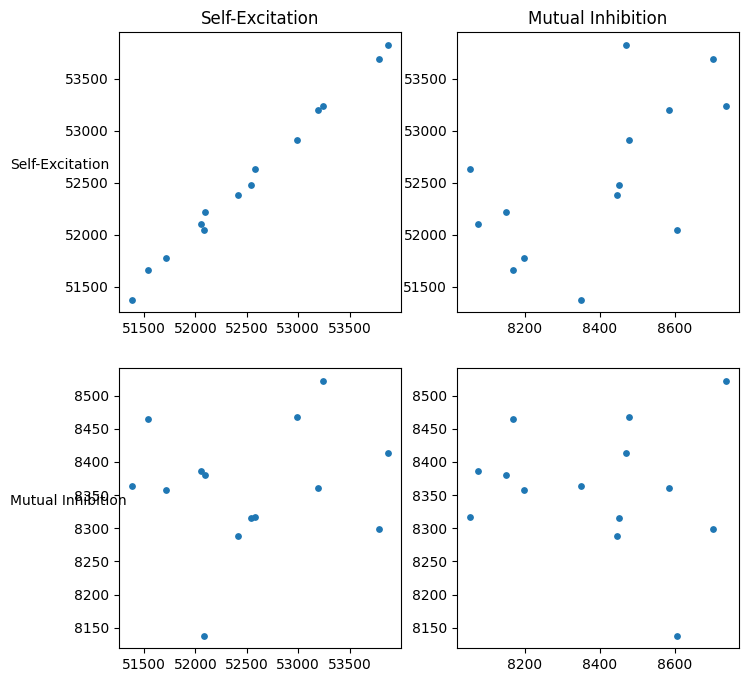

In [80]:
## n_trials = 300
par_labels = ["Self-Excitation", "Mutual Inhibition"]
par_fitted_labels = ["Self-Excitation", "Mutual Inhibition"]
sim_fit_plot_all(param_IDM[6:,:], par_fitted[6:,:], par_labels, par_fitted_labels, s = 15, figsize=(8,8))



In [42]:


mnle_posterior = trainer.build_posterior(prior = prior_IDM)
mnle_posterior.set_default_x(x_o)
mnle_map = mnle_posterior.map()

In [35]:
mnle_samples.mean(axis = 0)

tensor([52684.1406,  8394.2861])

In [63]:
param_IDM

tensor([[52177.5781,  8234.9609],
        [52032.0312,  8554.4590],
        [52712.1562,  8334.4307],
        [52285.8398,  8366.1318],
        [52361.7695,  8562.0693],
        [52092.7383,  8542.4902],
        [52257.8945,  8373.7188],
        [52741.2266,  8594.3184],
        [52489.3164,  8522.0615],
        [52631.3398,  8545.9443],
        [52014.8281,  8405.7832],
        [52047.5820,  8310.4395],
        [52951.9062,  8318.0166],
        [52004.1602,  8456.3682],
        [52858.1562,  8282.7783],
        [52601.0547,  8491.3115],
        [52746.4414,  8455.9863],
        [52884.5898,  8455.4971],
        [52722.8086,  8358.4023],
        [52308.7969,  8556.6738]])